Accuracy: 0.9897959183673469
Confusion Matrix:
 [[741   0]
 [  9 132]]
Classification Report:
               precision    recall  f1-score   support

       False       0.99      1.00      0.99       741
        True       1.00      0.94      0.97       141

    accuracy                           0.99       882
   macro avg       0.99      0.97      0.98       882
weighted avg       0.99      0.99      0.99       882



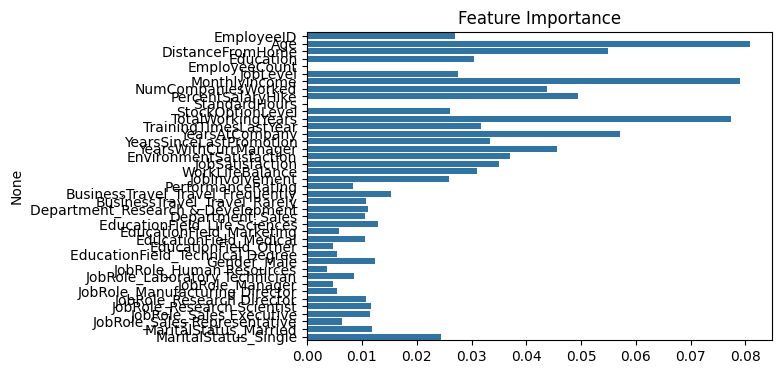

Attrition risk predictions for current employees saved to 'current_employees_attrition_risk.csv'


C:\Users\engrc\AppData\Local\Temp\ipykernel_10604\2158331813.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_employees['Attrition_Risk'] = attrition_risk


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load the dataset
data = pd.read_csv('Attrition data.csv')

# Convert categorical variables into numeric using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Define the features (X) and target variable (y)
X = data.drop(columns=['Attrition_Yes'])
y = data['Attrition_Yes']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Get feature importance
importances = model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.show()

# Save the model to a file
joblib.dump(model, 'attrition_model.pkl')

# Save predictions on test data to a CSV file
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
predictions_df.to_csv('attrition_predictions.csv', index=False)

# --- New Block for Predicting Attrition Risk for Current Employees ---
# Predict attrition risk for current employees (assuming 0 means "No" attrition)
current_employees = data[data['Attrition_Yes'] == 0]

# Standardize the features for current employees
current_employees_scaled = scaler.transform(current_employees.drop(columns=['Attrition_Yes']))

# Predict attrition risk for current employees
attrition_risk = model.predict(current_employees_scaled)

# Add the predictions to the current employees DataFrame
current_employees['Attrition_Risk'] = attrition_risk

# Save current employees' attrition risk to a CSV file
current_employees.to_csv('current_employees_attrition_risk.csv', index=False)

print("Attrition risk predictions for current employees saved to 'current_employees_attrition_risk.csv'")
